## Arte, arte, arte.

![Marta](arteartearte.jpg){width=30% fig-align="left"}

Si, eso. Nadie saber hacer un gráfico como la gente.

Yo, el peor de todos.

Por eso, me entregué al libro ["Storytelling with Data: A Data Visualization Guide for Business Professionals"](https://www.amazon.com/Storytelling-Data-Visualization-Business-Professionals/dp/1119002257) de Cole Nussbaumer Knaflic.

Resumen? Maravilloso. Sin profundizar en ninguna herramienta (Excel, PowerBi, Python, R, etc.) ofrece una visión general de como contar una historia con herramientas gráficos. Pensar qué querés mostrar, para qué, cómo y para quién. Y lo explica a través de casos y gráficos, mejorándo los que podría hacer yo para llevarlos a nivel `Supremo`.

Desde el principio al final se apoya en algunos gráficos puntales, modificandolos y explicando el por qué, paso a paso. Eso genera que termines muy manija, y tengas 5 gráficos en la cabeza que quieras aplicar hasta para pagar el [Impuesto Inmobiliario](https://www.arba.gov.ar/GuiaTramites/categoriaTramite.asp?categ=35) en [ARBA](https://www.arba.gob.ar).

El desafío es, entonces, bajar esos conceptos y gráficos a las herramientas que usa cada uno. Yo, como usuario de python, me puse a buscar a algún patriota que se haya tomado ese trabajo.

Y como lo que sobra en ese mundo son patriotas, encontre al bueno de [@phillipheita](https://www.linkedin.com/in/phillip-heita/) y su artículo en Médium [Storytelling with data in Python](https://medium.com/@phillipheita/storytelling-with-data-in-python-a6e1eebfa91b), donde intenta replicar uno de los gráficos insignias del libro en python y con Matplotlib. El patriota finalmente vino de Namibia...

Cómo siempre, [Murphy](https://es.wikipedia.org/wiki/Ley_de_Murphy) está presente. El resultado de su código no me quedaba nada similar al del libro, así que tuve que meter un poco de mano.

Para lo que me sirvió, es para ver la cantidad de parámetros que se pueden configurar en Matplotlib. Podés modificar absolutamente todo. Al principio te mareas, pero después...sos un artista. 

A continuación una imágen del gráfico del libro. 

![Gráfico original del libro](grafico-libro.jpeg){fig-align="left"}

El truco es tener cada serie de datos (`received` y `processed`) 'partida' en dos. En el `dataframe` tenemos las series completas. Pero en luego creamos dos series mas chicas, sólo con los datos a los cuales le queremos poner el `label`. Las lineas se superponen, por lo que tener 4 series no cambia en nada el aspecto visual, pero sólo mostramos los `labels` de las segundas y mas pequeñas series.

Para completar, mucha artesanía. Dibujamos una línea vertical, y agregamos el texto descriptivo en la ruptura de las series. Acomodamos los `labels` para que no pisen las líneas, y formateamos ejes y texto. Al final, el resultado.


##  Código

In [5]:
## Importamos librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set_style()

In [14]:
df = pd.DataFrame({'Month':['January','February','March','April','May','June','July','August','September','October','November','December'],
                   'Ticket_Volume_Received':[160,184,241,149,180,161,132,202,160,139,149,177],
                   'Ticket_Volume_Processed':[160,184,237,148,181,150,123,156,126,104,124,140]})
names= ['January','February','March','April','May','June','July','August','September','October','November','December']
names2= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

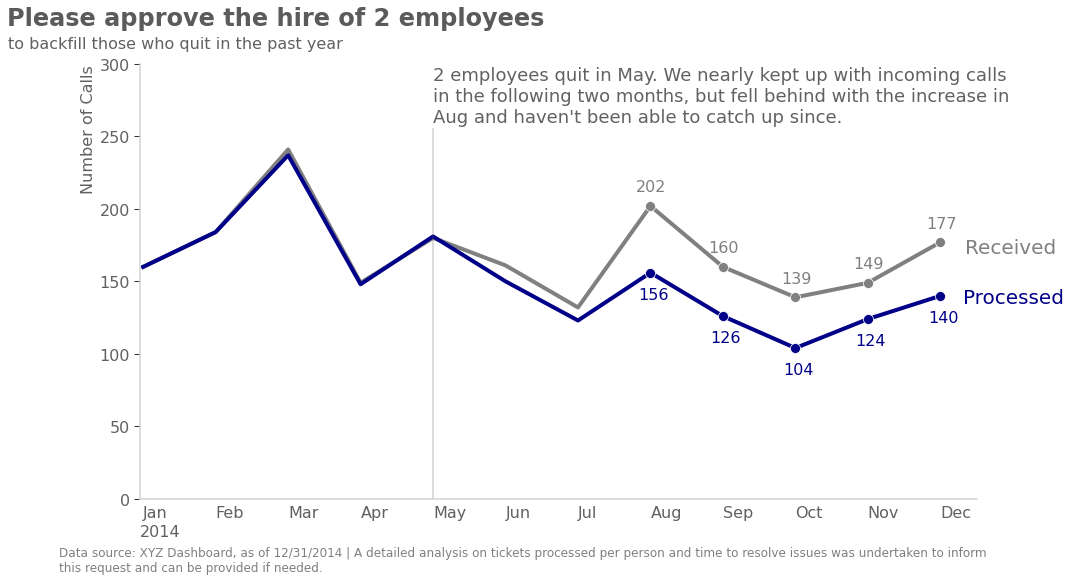

In [16]:
# | fig-cap: Esta es mi aproximación...

y_data = [202,160,139,149,177]
x_data = [7, 8, 9, 10, 11]
n = [202,160,139,149,177]

y1_data = [156,126,104,124,140]
x1_data = [7, 8, 9, 10, 11]
n1 = [156,126,104,124,140]

%matplotlib inline


markers_on = [202,160,139,149,177]
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

# Varaibles que definen el subconjunto de datos que será graficada en otra línea
sns.lineplot(data=df, x = df.index,y=df['Ticket_Volume_Received'],
             lw=4,
             color='#808080',
             ax=ax
            )
sns.lineplot(data=df, x = df.index,y=df['Ticket_Volume_Processed'],
             lw=4,
             color='#000088',
             ax=ax
            )

# Serie que define a que punto le ponemos lables. Esto es a partir del mes 7 (o posición 7 del eje x)
sns.lineplot(x=x_data,y=y_data,marker='o',markersize=10,color='#808080',ax=ax)
sns.lineplot(x= x1_data,y= y1_data,marker='o',markersize=10,color='#000088',ax=ax)

# Títulos
plt.suptitle('Please approve the hire of 2 employees', fontweight ="bold", fontsize=24, 
             ha='right',
             color='#5c5a5b', 
            )
plt.title('to backfill those who quit in the past year',fontsize=16,ha='right',va='top',color='#616161',
          loc='left',
          y=1.05, x=0.2425
         )

# Eliminamos el eje x (top) e y (right)
sns.despine()

# Definimos los colores de los ejes visibles x e y
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

# Leyenda manual de las líneas
ax.text(12.6, 180, 'Received', ha='right', va='top', fontsize=20,color='#808080')
ax.text(12.7, 145, 'Processed', ha='right', va='top', fontsize=20,color='#000088')

# Texto
plt.annotate("2 employees quit in May. We nearly kept up with incoming calls\nin the following two months,\
 but fell behind with the increase in\nAug and haven't been able to catch up since.",
             xy=(4,60),xytext=(4,260),color='#616161',fontsize=18)

# No ponemos titulo al eje Y. mas abajo le asignamos "Number of calls"
plt.ylabel('')

# Longitud del tick del eje y
ax.yaxis.set_tick_params(
                        length=6
                        )

# Ancho de la línea de los ejes x e y
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Color y largo de las tick lines de ambos ejes
ax.tick_params(axis='x', color='#616161', pad=3)

# Eliminamos los ticks del eje x
plt.tick_params(bottom = False) 


# Color y tamaño de la fuente del texto de las ticklines del eje x e y
plt.xticks(fontsize=16, ha='left', color='#616161')
plt.yticks(fontsize=16, color='#616161')

# Posición de los labels de los ejes x e y
ax.set_ylabel('Number of Calls', loc='top',fontsize=16,color='#616161')
ax.set_xlabel('2014', loc='left', fontsize=16, color='#616161')

# Sacamos el valor 0 del eje x para que no arranque en enero
plt.xlim(-0.05,11.5)
plt.ylim(0,300)

# Linea vertical
plt.axvline(x=4, ymin=0, ymax=0.85, color='#616161', alpha=0.3)

# Labels de los puntos del eje x (remplazamos números por meses)
ax.set(xticks=range(0, 12), xticklabels=list(names2))
# plt.ylabel('Number of Calls',fontsize=16,color='#616161',ha='left',va='bottom')

# Etiquetamos los puntos de la linea corta azul
for i, txt in enumerate(n):
    ax.annotate(txt, (x_data[i]-0.2, y_data[i]+10),fontsize=16, color='#808080')
    
# Etiquetamos los puntos de la linea corta gris
for i, txt in enumerate(n1):
    ax.annotate(txt, (x1_data[i]+0.25, y1_data[i]-20),
                fontsize=16, color='#000088',
                ha='right', va='bottom'
               )

fig.text(
        0.05, 0.000,
        'Data source: XYZ Dashboard, as of 12/31/2014 | A detailed analysis on tickets processed per person and time to resolve issues was undertaken to inform \nthis request and can be provided if needed.',
        ha='left',
        fontsize=12,color='#808080');
